## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/knn`

In [13]:
! git clone https://www.github.com/cn5dwt/assignment3



fatal: destination path 'assignment3' already exists and is not an empty directory.


**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [14]:
import pandas as pd
import numpy as np

In [15]:
# 1
cdata = pd.read_csv("assignment3/data/car_data.csv") # read in the data
cdata.head() # looking at the first few rows of dataset

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [16]:
cdata.shape # dimensions of dataset

(1000, 5)

In [17]:
#2
# UserID = unique identifier for each car customer
# Gender = Whether the customer identifies as male/female
# Age = How old the customer was at the time of purchase
# Annual salary = income of customer
# Purchased = Whether the customer purchased the car or not (0 = did not purchase, 1 = purchase)

In [18]:
missings = cdata.isnull().sum() # add up all the missing values in the car data
print(missings) # there are no missings to clean

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64


In [19]:
cdata["Gender"] = cdata["Gender"].replace({"Male" : 0, "Female" : 1}) # code from stackoverflow
cdata.head() # shows gender variable conversion

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,0,35,20000,0
1,681,0,40,43500,0
2,353,0,49,74000,0
3,895,0,40,107500,1
4,661,0,25,79000,0


In [20]:
from sklearn.neighbors import KNeighborsClassifier as kNNClassifier # Import the kNN regression tool
y = cdata['Purchased'] # Create target variable vector
X = cdata.loc[:,['Age','AnnualSalary']] # Create feature matrix

In [21]:
# 3

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

X = X.apply(maxmin) # apply max-min normalization to X

In [22]:
# 4

# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

In [23]:
# 5
k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

[44 45]


In [24]:
# 6
import matplotlib.pyplot as plt

model = kNNClassifier(n_neighbors=k_star[0]) # Create a sk model
fitted_model = model.fit(X_train,y_train)

y_hat = fitted_model.predict(X_test)

conf_data = (y_test, y_hat) #code from geeksforgeeks
conf_df = pd.DataFrame(conf_data) # create dataframe for matrix

#make a confusion matrix with pd.crosstab
conf_matrix = pd.crosstab(y_hat,y_test,rownames=['y_hat'],colnames=['y_test'])
print(conf_matrix)

# The model predicted a sale 3 times when there was no sale. The model predicted for 106 of the data points.
# The model predicted no sale 13 times there was sale. The model predicted correctly for 78 of the data points.
#Overal the model is accurate, however it is more accurate when there is no sale.

y_test    0   1
y_hat          
0       106   3
1        13  78


In [25]:
# 7
# subsetting data for gender
men_subset = cdata[cdata['Gender'] == 0]
women_subset = cdata[cdata['Gender'] == 1]

In [27]:
# for men
y = men_subset['Purchased'] # Create target variable vector
X = men_subset.loc[:,['Age','AnnualSalary']] # Create feature matrix

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

X = X.apply(maxmin) # apply max-min normalization to X

# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

model = kNNClassifier(n_neighbors=k_star[0]) # Create a sk model
fitted_model = model.fit(X_train,y_train)

y_hat = fitted_model.predict(X_test)

conf_data = (y_test, y_hat) #code from geeksforgeeks
conf_df = pd.DataFrame(conf_data) # create dataframe for matrix

#make a confusion matrix with pd.crosstab
conf_matrix = pd.crosstab(y_hat,y_test,rownames=['y_hat'],colnames=['y_test'])
print(conf_matrix)

[4]
y_test   0   1
y_hat         
0       61   3
1        1  32


In [28]:
# for women
y = women_subset['Purchased'] # Create target variable vector
X = women_subset.loc[:,['Age','AnnualSalary']] # Create feature matrix

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

X = X.apply(maxmin) # apply max-min normalization to X

# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

model = kNNClassifier(n_neighbors=k_star[0]) # Create a sk model
fitted_model = model.fit(X_train,y_train)

y_hat = fitted_model.predict(X_test)

conf_data = (y_test, y_hat) #code from geeksforgeeks
conf_df = pd.DataFrame(conf_data) # create dataframe for matrix

#make a confusion matrix with pd.crosstab
conf_matrix = pd.crosstab(y_hat,y_test,rownames=['y_hat'],colnames=['y_test'])
print(conf_matrix)

[22 23 24 25 26 38 40 46 47 48 49 50 51 52 53]
y_test   0   1
y_hat         
0       57   3
1        7  37


The model predicted more accurately for men than women. For no sale, the model predicted incorrectly 3/61 times for men and 3/57 for women. For sale, the model predicted incorrectly for 1/32 cases for mena nd 7/37 times for women. In my discussion for question 3, I stated that the model predicted more accurately for no sale than sale. However, by looking at gender-specific data, most of the wrong predictions were for women, not men.

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [29]:
#1
usac = pd.read_csv("assignment3/data/USA_cars_datasets.csv") #read USA cars dataset

In [30]:
# subset data
vlist = ['price', 'year', 'mileage']
new_usac = usac.filter(vlist)
new_usac.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [31]:
new_usac.shape

(2499, 3)

In [32]:
missing = new_usac.isnull().sum() # add up all the missing values in the car data
print(missing) # there are no missings to clean

price      0
year       0
mileage    0
dtype: int64


In [33]:
#2
def maxmin(z):
    z_min = min(z)
    z_max = max(z)
    z_normalized = (z - z_min) / (z_max - z_min)
    return z_normalized

# Apply max-min normalization to "year" column
new_usac["year"] = maxmin(new_usac["year"])

# Apply max-min normalization to "mileage" column
new_usac["mileage"] = maxmin(new_usac["mileage"])

new_usac.head()

,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


In [34]:
#3
from sklearn.neighbors import KNeighborsRegressor as kNNRegression # Import the kNN regression tool

y = new_usac['price'] # Create target variable vector
X = new_usac.loc[:,['year','mileage']] # Create feature matrix

In [42]:
# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

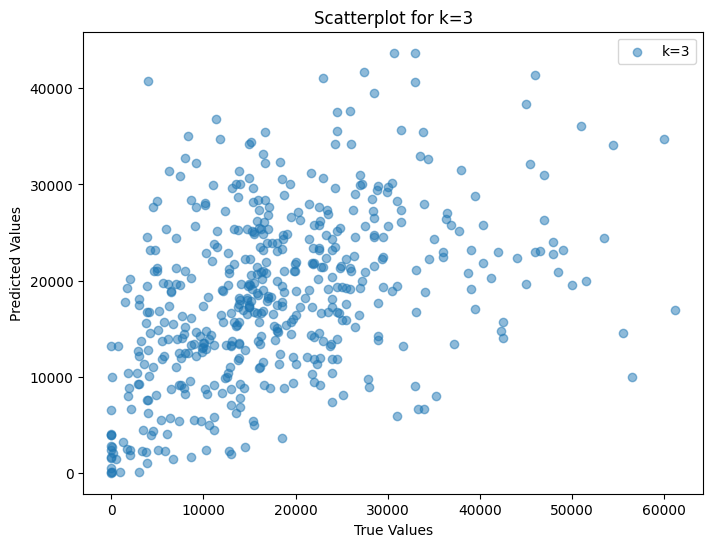

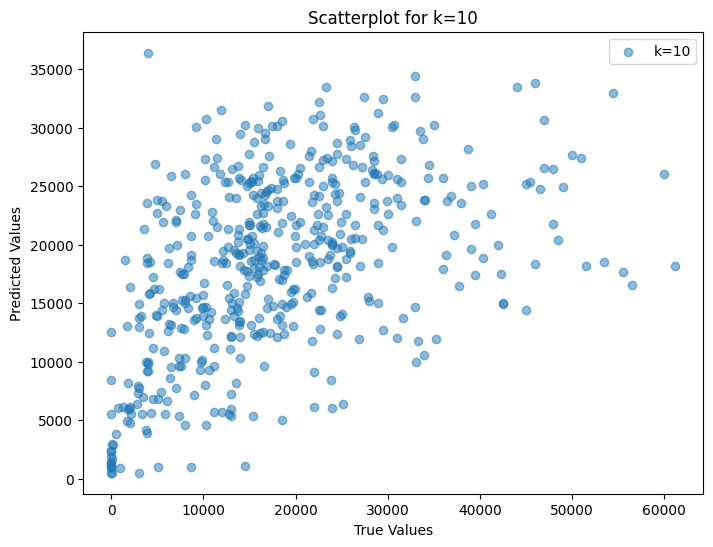

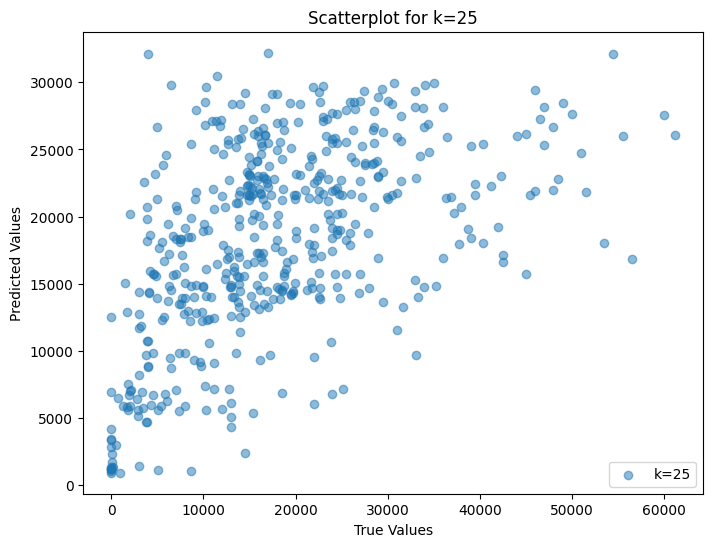

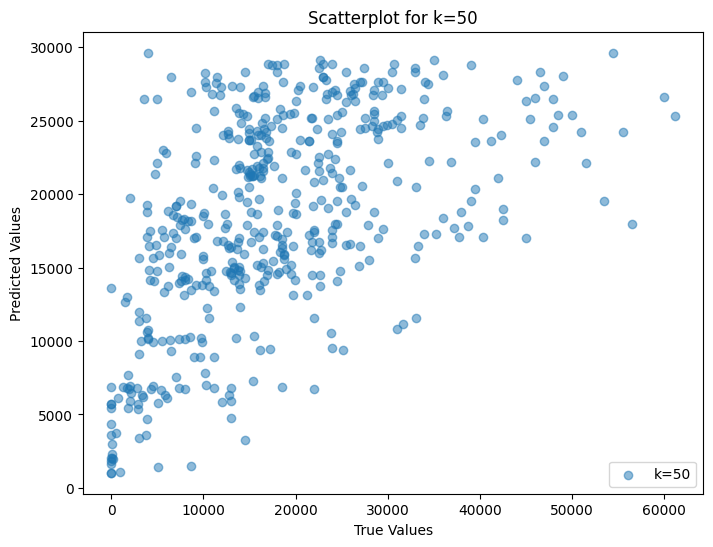

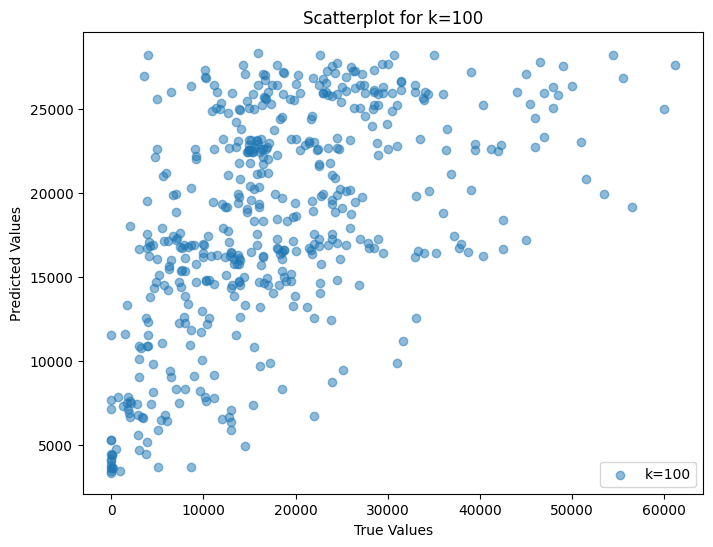

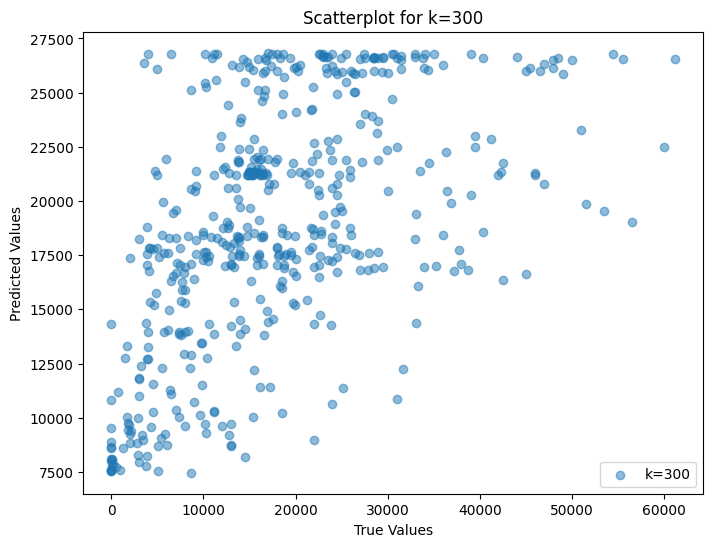

k=3: SSE_test=63223286609.11111
k=10: SSE_test=55401092793.409996
k=25: SSE_test=51585228924.304
k=50: SSE_test=49847721982.09799
k=100: SSE_test=49135529480.4603
k=300: SSE_test=50238649457.106


In [43]:
# 4
k_values = [3, 10, 25, 50, 100, 300] # k-values to compute

SSE_train = np.zeros(len(k_values))
SSE_test = np.zeros(len(k_values))

for i, k in enumerate(k_values):
    model = kNNRegression(n_neighbors=k) # Create a kNN regression model
    fitted_model = model.fit(X_train, y_train) # Train the model on the training data

    # Predict values for the test set
    y_hat_test = fitted_model.predict(X_test)

    # Calculate SSE for test set
    SSE_test[i] = np.sum((y_test - y_hat_test)**2)

    # Create a scatterplot for test set predictions
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_hat_test, label=f'k={k}', alpha=0.5)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatterplot for k={k}')
    plt.legend()
    plt.show()

# Print SSE values for each k
for i, k in enumerate(k_values):
    print(f'k={k}: SSE_test={SSE_test[i]}')

In [44]:
k_bar = 300
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegression(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

[77]


The k values seem to be underfitted until the optimal k value and then overfits.As k values approach the optimal k, it becomes underfitted (increasing towards k) and as increase from k (a higher value away from k) it becomes more overfitted.

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [40]:
# print(abnb["Price"].unique())
abnb['Price'] = abnb['Price'].str.replace('\,', '', regex=True)
abnb['Price'] = pd.to_numeric(abnb['Price'])

In [39]:
#1
abnb = pd.read_csv("assignment3/data/airbnb_hw.csv")
abnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [41]:
# print(type(abnb['Number Of Reviews']))
# print(abnb["Number Of Reviews"].unique())
abnb['Number Of Reviews'] = pd.to_numeric(abnb['Number Of Reviews'])

In [45]:
# print(type(abnb['Beds']))
abnb['Beds'] = abnb['Beds'].fillna(0)
abnb['Beds'] = abnb['Beds'].astype(int)
print(abnb["Beds"].unique())

[ 1  3  2  4  5  0  6 10  7  8 12 16  9 11]


In [46]:
abnb['Review Scores Rating (bin)'] = abnb['Review Scores Rating (bin)'].fillna(0)
print(abnb['Review Scores Rating (bin)'].unique())
abnb['Review Scores Rating (bin)'] = abnb['Review Scores Rating (bin)'].fillna(0)
abnb['Review Scores Rating (bin)'] = abnb['Review Scores Rating (bin)'].astype(str)
abnb['Review Scores Rating (bin)'] = abnb['Review Scores Rating (bin)'].str.replace('\.', '', regex=True)
print(type(abnb['Review Scores Rating (bin)']))
abnb['Review Scores Rating (bin)'] = abnb['Review Scores Rating (bin)'].astype(int)

[  0.  95. 100.  90.  85.  80.  75.  65.  70.  60.  40.  50.  20.  55.
  45.  30.]
<class 'pandas.core.series.Series'>


In [47]:
# 2
abnb.dropna(inplace=True)

In [48]:
def maxmin(z):
    z_min = min(z)
    z_max = max(z)
    z_normalized = (z - z_min) / (z_max - z_min)
    return z_normalized

# abnb['Price'] = maxmin(abnb['Price']) # Apply max-min normalization to "price" column
abnb['Number Of Reviews'] = maxmin(abnb['Number Of Reviews']) # Apply max-min normalization to "number of reviews" column
abnb['Beds'] = maxmin(abnb['Beds'])
abnb['Review Scores Rating (bin)'] = maxmin(abnb['Review Scores Rating (bin)']) # Apply max-min normalization to "number of reviews" column

abnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,0.9375,Private room,10036.0,0.1875,1,0.148438,549,96.0
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,1.0000,Entire home/apt,11222.0,0.0625,1,0.011719,149,100.0
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,1.0000,Entire home/apt,10004.0,0.0625,1,0.031250,250,100.0
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,0.8750,Private room,11201.0,0.0625,1,0.308594,90,94.0
8,2339,8/20/2008,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,0.8750,Entire home/apt,10009.0,0.1250,1,0.367188,270,90.0


In [49]:
#3
from sklearn.cluster import KMeans # Import kmc
model = KMeans(n_clusters=6, max_iter=2, random_state=0)
X = abnb.loc[:,['Number Of Reviews','Beds','Review Scores Rating (bin)']] # Create feature matrix
model = model.fit(X)

cluster = model.labels_ #stack overflow


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


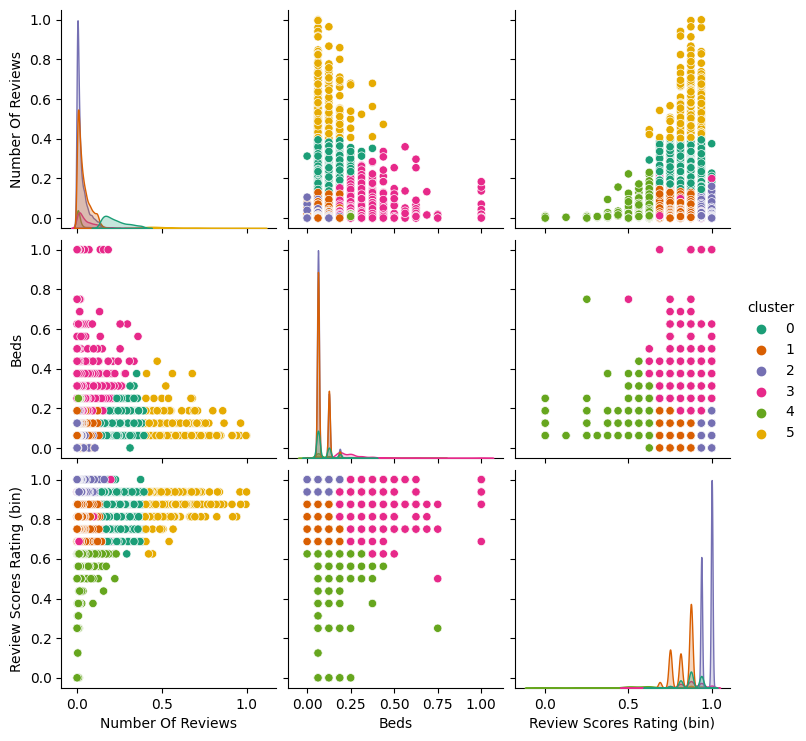

In [50]:
#4
import seaborn as sns
list = ['Number Of Reviews','Beds','Review Scores Rating (bin)'] #single out columns you want to work with
abnb_ss = abnb.filter(list) # subset df to only include specific columns
abnb_ss['cluster'] = cluster

sns.pairplot(abnb_ss, hue='cluster', markers='o', palette='Dark2')

In [51]:
#5
abnb.groupby(cluster)['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
0,2379.0,139.117697,82.033571,22.0,85.0,120.0,175.0,895.0
1,8077.0,133.981181,96.448867,20.0,79.0,119.0,170.0,5000.0
2,8750.0,154.667657,156.822370,10.0,85.0,130.0,195.0,10000.0
3,1722.0,289.987224,257.570552,27.0,150.0,225.0,350.0,4500.0
4,771.0,133.020752,199.536071,25.0,65.0,99.0,150.0,5000.0
5,354.0,125.528249,70.762825,30.0,79.0,100.0,160.0,600.0


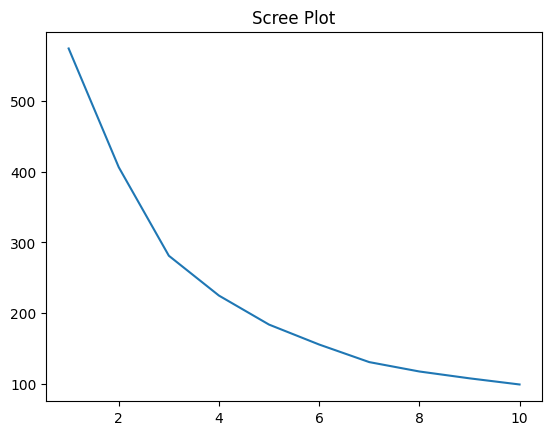

In [52]:
#6
k_bar = 10
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


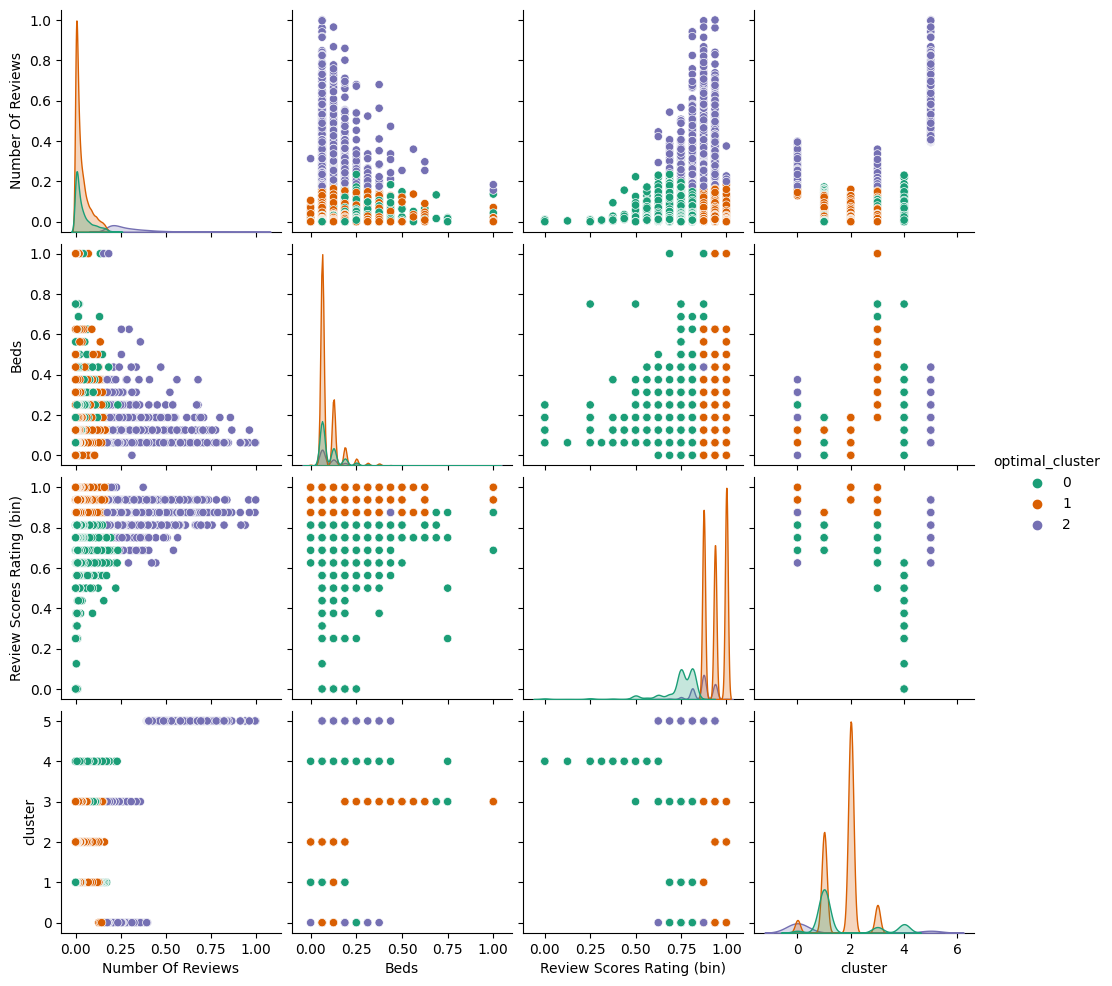

In [53]:
# optimal number of clusters seems to be 3
optimal_model = KMeans(n_clusters=3, max_iter=2, random_state=0)
X = abnb.loc[:,['Number Of Reviews','Beds','Review Scores Rating (bin)']] # Create feature matrix
optimal_model = optimal_model.fit(X)

optimal_cluster = optimal_model.labels_ #stack overflow

abnb_ss['optimal_cluster'] = optimal_cluster

sns.pairplot(abnb_ss, hue='optimal_cluster', markers='o', palette='Dark2')

In [54]:
abnb.groupby(optimal_cluster)['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
0,5361.0,143.177019,140.979338,20.0,75.0,115.0,177.0,5000.0
1,14602.0,160.918436,157.667655,10.0,89.0,135.0,195.0,10000.0
2,2090.0,141.397129,92.764748,27.0,85.0,120.0,175.0,1500.0


**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?